# Natural disasters

In [3]:
# Imports 
import pandas as pd
from pathlib import Path
import plotly.express as px
import panel as pn
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import numpy as np 
import hvplot.pandas

## Using FEMA disaster data 

In [4]:
# FEMA natural disaster csv
csv_file_disaster = Path('./data/FemaWebDisasterDeclarations.csv')
disasterdata_df = pd.read_csv(csv_file_disaster, parse_dates=True)

In [5]:
# Display the FEMA natural disaster dataset
disasterdata_df.head(5)

,declarationType,stateName,incidentType
0,Emergency,American Samoa,Hurricane
1,Emergency,Virgin Islands of the U.S.,Hurricane
2,Major Disaster,New Mexico,Flood
3,Emergency,Florida,Hurricane
4,Emergency,Florida,Hurricane


In [8]:
# Narrow down the FEMA natural disaster dataset columns
disaster_df = disasterdata_df[['declarationType','stateName', 'incidentType']]
# Display the FEMA natural disaster narrowed down column dataset
disaster_df.head(5)

,declarationType,stateName,incidentType
0,Emergency,American Samoa,Hurricane
1,Emergency,Virgin Islands of the U.S.,Hurricane
2,Major Disaster,New Mexico,Flood
3,Emergency,Florida,Hurricane
4,Emergency,Florida,Hurricane


In [10]:
# Rename the stateName and incidentType columns
disaster_df = disaster_df.rename(columns={
    "stateName": "State",
    "incidentType": "Natural Disaster Type"
})

disaster_df.head(5) 

,declarationType,State,Natural Disaster Type
0,Emergency,American Samoa,Hurricane
1,Emergency,Virgin Islands of the U.S.,Hurricane
2,Major Disaster,New Mexico,Flood
3,Emergency,Florida,Hurricane
4,Emergency,Florida,Hurricane


In [11]:
# Identify frequency values
disastertype_perstate = disaster_df[['State','Natural Disaster Type']].value_counts()

In [12]:
# Create DataFrame of top 20 natural disaster areas and types
disastertype_perstate = pd.DataFrame(disastertype_perstate.iloc[0:20])
disastertype_perstate

,,0
State,Natural Disaster Type,
California,Fire,273
Texas,Fire,255
Washington,Fire,126
Oklahoma,Fire,106
Oregon,Fire,98
Colorado,Fire,76
Nevada,Fire,74
Arizona,Fire,70
Florida,Fire,67


In [14]:
disastertype_perstate.rename(columns = { '0': 'State Name', '1': 'Natural Disaster Type', 0: 'Frequency'}, inplace=True)
disastertype_perstate.tail(5)

,,Frequency
State,Natural Disaster Type,
Kansas,Severe Storm(s),39
Mississippi,Severe Storm(s),38
Missouri,Severe Storm(s),37
California,Flood,37
Louisiana,Hurricane,36


<AxesSubplot:title={'center':'Top 20 Type of Natural Disaster Frequency Per State'}, ylabel='State,Natural Disaster Type'>

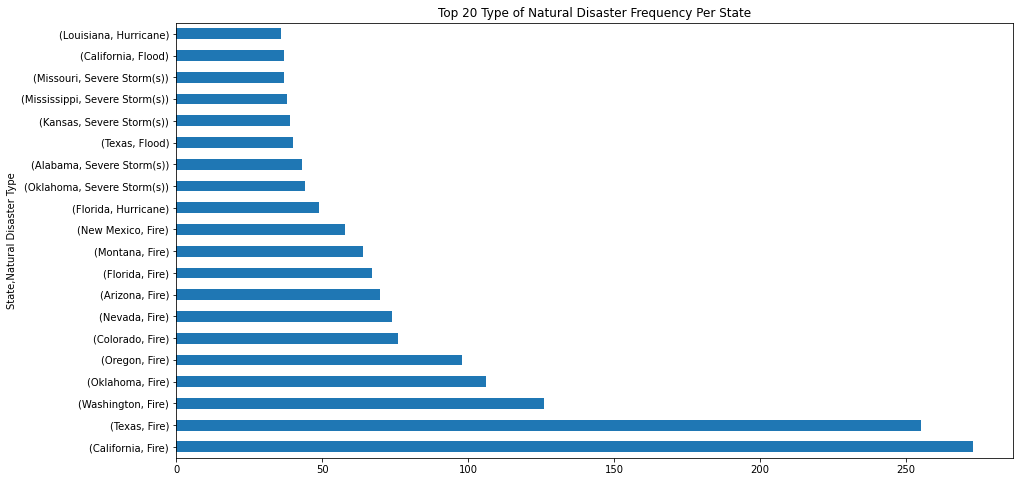

In [15]:
# Plot the top 20 natural disaster areas and types 
disastertype_perstate.plot(
    figsize=(15,8),
    kind='barh',
    legend=False,
    title="Top 20 Type of Natural Disaster Frequency Per State",
)

array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

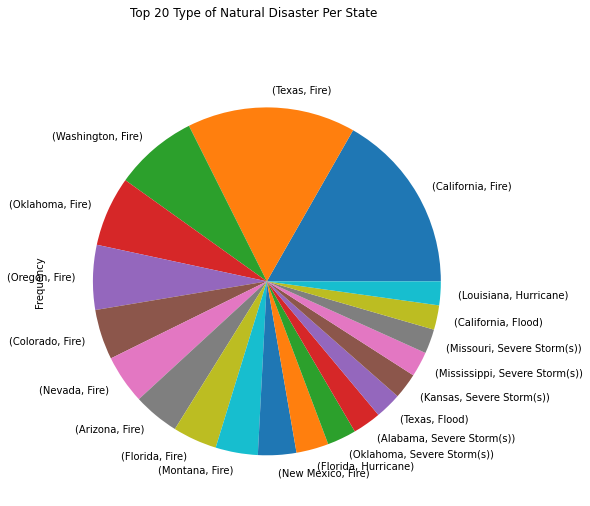

In [16]:
disastertype_perstate.plot(
    figsize=(15,8),
    subplots=True,
    kind='pie',
    legend=False,
    title="Top 20 Type of Natural Disaster Per State",
)

# So what, Hurricanes happen less frequently than Fires nationwide, but Fires more often in Florida than Hurricanes?

### It matters because of propety insurance rates. In Florida property insurance rates are astronomically high. So, the frequency of natural disasters matters. Then why does Florida have an annual Hurricane season, but not an Fire season, eventhough the natrual disaster Fire happens more often.

## Using NCEI NOAA disaster data to analyze the costs of natural disasters by type (costs in billions).
### We will try to predict some of the colums below utilizing LSTM  Predictor

In [17]:
# NCEI NOAA natural disaster csv
csv_file_disaster = Path('./data/timeseries_US.csv')
disastnumbers_df = pd.read_csv(csv_file_disaster, parse_dates=True)

In [18]:
# Display the FEMA natural disaster dataset
disastnumbers_df.tail(5)

,Year,Combined Count,Combined Count Rank,Combined Costs Billions,Combined Costs Rank,Combined Deaths,Combined Deaths Rank,Drought Count,Drought Cost,Flooding Count,...,Severe Storm Count,Severe Storm Cost,Tropical Cyclone Count,Tropical Cyclone Cost,Wildfire Count,Wildfire Cost,Winter Storm Count,Winter Storm Cost,All Disasters Count,All Disasters Cost
5,2017,16,3,346.1,1,3278,1,1,2.8,2,...,8,18.8,3,299.5,1,20.3,0,0.0,16,346.1
6,2018,14,6,100.1,6,247,16,1,3.3,0,...,8,12.8,2,53.9,1,26.4,2,3.7,14,100.1
7,2019,14,6,48.9,13,44,36,0,0.0,3,...,8,15.2,2,7.1,1,4.9,0,0.0,14,48.9
8,2020,22,1,102.0,5,262,15,1,4.8,0,...,13,35.8,7,43.8,1,17.6,0,0.0,22,102.0
9,2021,20,2,145.0,3,688,6,1,8.9,2,...,11,20.4,4,78.5,1,10.6,1,24.0,20,145.0


In [19]:
# Create DataFrame of top 20 natural disaster areas and types
disastnumbers_df = pd.DataFrame(disastnumbers_df)
disastnumbers_df.tail(5)

,Year,Combined Count,Combined Count Rank,Combined Costs Billions,Combined Costs Rank,Combined Deaths,Combined Deaths Rank,Drought Count,Drought Cost,Flooding Count,...,Severe Storm Count,Severe Storm Cost,Tropical Cyclone Count,Tropical Cyclone Cost,Wildfire Count,Wildfire Cost,Winter Storm Count,Winter Storm Cost,All Disasters Count,All Disasters Cost
5,2017,16,3,346.1,1,3278,1,1,2.8,2,...,8,18.8,3,299.5,1,20.3,0,0.0,16,346.1
6,2018,14,6,100.1,6,247,16,1,3.3,0,...,8,12.8,2,53.9,1,26.4,2,3.7,14,100.1
7,2019,14,6,48.9,13,44,36,0,0.0,3,...,8,15.2,2,7.1,1,4.9,0,0.0,14,48.9
8,2020,22,1,102.0,5,262,15,1,4.8,0,...,13,35.8,7,43.8,1,17.6,0,0.0,22,102.0
9,2021,20,2,145.0,3,688,6,1,8.9,2,...,11,20.4,4,78.5,1,10.6,1,24.0,20,145.0


In [20]:
# Clean data 
disastnumbers_df = disastnumbers_df.dropna()
disastnumbers_df.tail(5)

,Year,Combined Count,Combined Count Rank,Combined Costs Billions,Combined Costs Rank,Combined Deaths,Combined Deaths Rank,Drought Count,Drought Cost,Flooding Count,...,Severe Storm Count,Severe Storm Cost,Tropical Cyclone Count,Tropical Cyclone Cost,Wildfire Count,Wildfire Cost,Winter Storm Count,Winter Storm Cost,All Disasters Count,All Disasters Cost
5,2017,16,3,346.1,1,3278,1,1,2.8,2,...,8,18.8,3,299.5,1,20.3,0,0.0,16,346.1
6,2018,14,6,100.1,6,247,16,1,3.3,0,...,8,12.8,2,53.9,1,26.4,2,3.7,14,100.1
7,2019,14,6,48.9,13,44,36,0,0.0,3,...,8,15.2,2,7.1,1,4.9,0,0.0,14,48.9
8,2020,22,1,102.0,5,262,15,1,4.8,0,...,13,35.8,7,43.8,1,17.6,0,0.0,22,102.0
9,2021,20,2,145.0,3,688,6,1,8.9,2,...,11,20.4,4,78.5,1,10.6,1,24.0,20,145.0


In [43]:
# Set Year as index
disastnumbers_df.set_index("Year", drop=True, inplace=False, verify_integrity=False)

,Combined Count,Combined Count Rank,Combined Costs Billions,Combined Costs Rank,Combined Deaths,Combined Deaths Rank,Drought Count,Drought Cost,Flooding Count,Flooding Cost,...,Severe Storm Count,Severe Storm Cost,Tropical Cyclone Count,Tropical Cyclone Cost,Wildfire Count,Wildfire Cost,Winter Storm Count,Winter Storm Cost,All Disasters Count,All Disasters Cost
Year,,,,,,,,,,,,,,,,,,,,,
2012,11,9,142.4,4,377,10,1,36.9,0,0.0,...,7,20.0,2,83.4,1,2.1,0,0.0,11,142.4
2013,10,11,28.6,21,114,27,1,12.6,2,3.1,...,7,12.9,0,0.0,0,0.0,0,0.0,10,28.6
2014,9,13,21.8,24,53,33,1,4.7,1,1.2,...,6,13.3,0,0.0,0,0.0,1,2.6,9,21.8
2015,11,9,27.5,22,158,21,1,5.3,2,5.4,...,6,9.7,0,0.0,1,3.6,1,3.5,11,27.5
2016,15,5,54.0,12,138,24,1,4.0,4,18.6,...,8,16.9,1,11.7,1,2.8,0,0.0,15,54.0
2017,16,3,346.1,1,3278,1,1,2.8,2,3.6,...,8,18.8,3,299.5,1,20.3,0,0.0,16,346.1
2018,14,6,100.1,6,247,16,1,3.3,0,0.0,...,8,12.8,2,53.9,1,26.4,2,3.7,14,100.1
2019,14,6,48.9,13,44,36,0,0.0,3,21.7,...,8,15.2,2,7.1,1,4.9,0,0.0,14,48.9
2020,22,1,102.0,5,262,15,1,4.8,0,0.0,...,13,35.8,7,43.8,1,17.6,0,0.0,22,102.0


In [44]:
# Create the features X and target y data
def window_data(disastnumbers_df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(disastnumbers_df) - window):
        features = disastnumbers_df.iloc[i : (i + window), feature_col_number]
        target = disastnumbers_df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [45]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 5

feature_column = 5
target_column = 5
X, y = window_data(disastnumbers_df, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:10]} \n")
print (f"y sample values:\n{y[:10]}")

X sample values:
[[ 377  114   53  158  138]
 [ 114   53  158  138 3278]
 [  53  158  138 3278  247]
 [ 158  138 3278  247   44]
 [ 138 3278  247   44  262]] 

y sample values:
[[3278]
 [ 247]
 [  44]
 [ 262]
 [ 688]]


In [46]:
# Use 70% of the data for training and the remainder for testing
split = int(0.8 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [47]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

In [48]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the training feature data X_train
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the training target data y_train
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [49]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[1.        ]
  [0.58095238]
  [0.        ]
  [0.00636943]
  [0.02906617]]

 [[0.1882716 ]
  [0.        ]
  [0.03255814]
  [0.        ]
  [1.        ]]

 [[0.        ]
  [1.        ]
  [0.02635659]
  [1.        ]
  [0.06277056]]

 [[0.32407407]
  [0.80952381]
  [1.        ]
  [0.03471338]
  [0.        ]]] 

X_test sample values:
[[[ 2.62345679e-01]
  [ 3.07142857e+01]
  [ 6.01550388e-02]
  [-2.99363057e-02]
  [ 6.74087817e-02]]]


In [50]:
# Import required Keras modules
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [51]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 7
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [52]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error", metrics=['accuracy'])

In [53]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 7)              252       
                                                                 
 dropout (Dropout)           (None, 5, 7)              0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 7)              420       
                                                                 
 dropout_1 (Dropout)         (None, 5, 7)              0         
                                                                 
 lstm_2 (LSTM)               (None, 7)                 420       
                                                                 
 dropout_2 (Dropout)         (None, 7)                 0         
                                                                 
 dense (Dense)               (None, 1)                 8

In [54]:
# Train the model
model.fit(X_train, y_train, epochs=20, shuffle=False, batch_size=1, verbose=1)

Epoch 1/20
4/4 [==============================] - 34s 27ms/step - loss: 0.2686 - accuracy: 0.2500
Epoch 2/20
4/4 [==============================] - 0s 31ms/step - loss: 0.2611 - accuracy: 0.2500
Epoch 3/20
4/4 [==============================] - 0s 43ms/step - loss: 0.2365 - accuracy: 0.2500
Epoch 4/20
4/4 [==============================] - 0s 37ms/step - loss: 0.2550 - accuracy: 0.2500
Epoch 5/20
4/4 [==============================] - 0s 101ms/step - loss: 0.2443 - accuracy: 0.2500
Epoch 6/20
4/4 [==============================] - 1s 198ms/step - loss: 0.2419 - accuracy: 0.2500
Epoch 7/20
4/4 [==============================] - 0s 47ms/step - loss: 0.2357 - accuracy: 0.2500
Epoch 8/20
4/4 [==============================] - 0s 58ms/step - loss: 0.2245 - accuracy: 0.2500
Epoch 9/20
4/4 [==============================] - 0s 34ms/step - loss: 0.2171 - accuracy: 0.2500
Epoch 10/20
4/4 [==============================] - 0s 32ms/step - loss: 0.2116 - accuracy: 0.2500
Epoch 11/20
4/4 [=========

In [55]:
# Evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 13s 13s/step - loss: 0.0029 - accuracy: 0.0000e+00


[0.002923827152699232, 0.0]

In [56]:
# Make some predictions
predicted = model.predict(X_test)

In [57]:
# Recover the original numbers instead of the scaled version
predicted_numbers = scaler.inverse_transform(predicted)
real_numbers = scaler.inverse_transform(y_test.reshape(-1, 1))

In [58]:
predicted_numbers

array([[513.1298]], dtype=float32)

In [59]:
# Create a DataFrame of Real and Predicted values
numbers = pd.DataFrame({
    "Real Numbers": real_numbers.ravel(),
    "Predicted Numbers": predicted_numbers.ravel()
    }, index = disastnumbers_df.index[-len(real_numbers): ])
numbers.head()

,Real Numbers,Predicted Numbers
9,688.0,513.129822


<AxesSubplot:title={'center':'Real Vs. Predicted Costs in Billions'}>

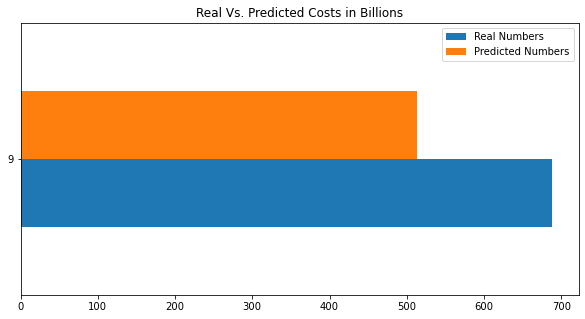

In [60]:
# Plot the real vs predicted costs as a line barchart
numbers.plot(    
    figsize=(10,5),
    kind='barh',
    legend=True,
    title="Real Vs. Predicted Costs in Billions",
    use_index=True
)

## Word Cloud

In [61]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

# Code to download corpora
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\UNIVE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UNIVE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\UNIVE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


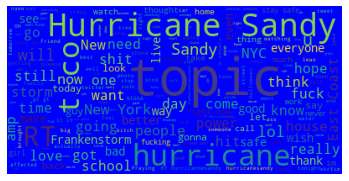

In [63]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
corpus = open('./data/natdisastone.csv', mode="r", encoding="utf-8").read()
stopwords = set(STOPWORDS)

wc = WordCloud(background_color="blue",
               stopwords=stopwords,
)
wc.generate(corpus)
plt.axis("off")
plt.imshow(wc)

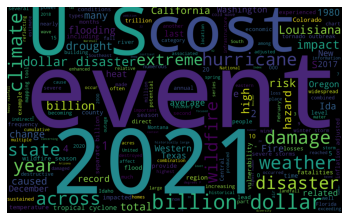

In [64]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
corpus = open('./data/article_one.csv').read()
stopwords = set(STOPWORDS)

wc = WordCloud(background_color="black",
               stopwords=stopwords,
               width=2600,
               height=1600, 
               include_numbers=True)
wc.generate(corpus)
plt.axis("off")
plt.imshow(wc)

## Using newsapi to obtain articles about "crypto" 

In [65]:
# Initial imports
import os
import pandas as pd
from pathlib import Path
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()

True

In [66]:
# Retrieve the News API key
api_key = os.getenv("news_api")

In [67]:
# Create the newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [68]:
# Obtaining articles about cyrpto 
crypto_headlines = newsapi.get_everything(q="cyrpto", language="en", sort_by="relevancy")
# Show sample article
crypto_headlines["articles"][1]

{'source': {'id': None, 'name': 'Coinjournal.net'},
 'author': 'Daniela Kirova',
 'title': 'You can now buy Uniswap, the most popular decentralized trading protocol: here’s where',
 'description': 'Uniswap is the 23rd biggest crypto by market cap. At the time of writing,…\nThe post You can now buy Uniswap, the most popular decentralized trading protocol: here’s where appeared first on Coin Journal.',
 'url': 'https://coinjournal.net/news/you-can-now-buy-uniswap-the-most-popular-decentralized-trading-protocol-heres-where/',
 'urlToImage': 'https://coinjournal.net/wp-content/uploads/2021/08/1629191852472-51f9fe81-4312-4d6f-b62e-d62a037cc8b3.png',
 'publishedAt': '2022-03-25T11:59:09Z',
 'content': 'Uniswap is the 23rd biggest crypto by market cap. At the time of writing, it was trading for just over $11 with a 24-hour trading volume of almost $332 million. Today, its token UNI has gained 7.13%.… [+2020 chars]'}

In [69]:
# Print total articles
print(f"Total articles about crypto: {crypto_headlines['totalResults']}")

Total articles about crypto: 4


In [70]:
# Transform the response dictionary to a DataFrame
crypto_df = pd.DataFrame.from_dict(crypto_headlines["articles"])
crypto_df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Yahoo Entertainment'}",Puration Inc.,PURA Believes Hemp Can Take A Big Bite Into The $77 Billion Plant Based Food Market,"Dallas, Texas, April 07, 2022 (GLOBE NEWSWIRE) -- Puration, Inc. (OTC Pink: PURA) is building its Farmersville Hemp Brand as a multi-industry disruptor that ...",https://finance.yahoo.com/news/pura-believes-hemp-big-bite-164000127.html,https://s.yimg.com/uu/api/res/1.2/7jtQltRekDqtVW4k6A84XQ--~B/aD00MDg7dz02ODA7YXBwaWQ9eXRhY2h5b24-/https://media.zenfs.com/en/globenewswire.com/51e0265c7776a477651c2069efbd42fe,2022-04-07T16:40:00Z,"Dallas, Texas, April 07, 2022 (GLOBE NEWSWIRE) -- Puration, Inc. (OTC Pink: PURA) is building its Farmersville Hemp Brand as a multi-industry disruptor that can improve many existing products and ser… [+2876 chars]"
1,"{'id': None, 'name': 'Coinjournal.net'}",Daniela Kirova,"You can now buy Uniswap, the most popular decentralized trading protocol: here’s where","Uniswap is the 23rd biggest crypto by market cap. At the time of writing,…\nThe post You can now buy Uniswap, the most popular decentralized trading protocol: here’s where appeared first on Coin Journal.",https://coinjournal.net/news/you-can-now-buy-uniswap-the-most-popular-decentralized-trading-protocol-heres-where/,https://coinjournal.net/wp-content/uploads/2021/08/1629191852472-51f9fe81-4312-4d6f-b62e-d62a037cc8b3.png,2022-03-25T11:59:09Z,"Uniswap is the 23rd biggest crypto by market cap. At the time of writing, it was trading for just over $11 with a 24-hour trading volume of almost $332 million. Today, its token UNI has gained 7.13%.… [+2020 chars]"
2,"{'id': None, 'name': 'Daily Mail'}","Australian Associated, Antoinette Milienos",Australia's cryptocurrency investors face big crackdown,Australian investors are being warned of an overhaul set to regulate cryptocurrency transactions. The government shake-up will include new tax regimes on digital payments.,https://www.dailymail.co.uk/news/article-10633791/Australias-cryptocurrency-investors-face-big-crackdown.html,https://i.dailymail.co.uk/1s/2022/03/21/00/55593107-0-image-a-2_1647822346624.jpg,2022-03-21T02:10:50Z,Cryptocurrency investors face a major crackdown as a 'regulatory regime' is set up to overhaul Australian digital payments. \r\nThe government wants a big shakeup of Australia's payments system in nex… [+4218 chars]
3,"{'id': None, 'name': 'Business Standard'}",Press Trust of India,Govt should come out with legislation on crypto soon: Cong MP Gaurav Gogoi,"The government is still sending mixed signals on virtual digital assets and there should be clarity on the definition of crypto, he said while initiating a debate on the Finance Bill in Lok Sabha",https://www.business-standard.com/article/current-affairs/govt-should-come-out-with-legislation-on-crypto-soon-cong-mp-gaurav-gogoi-122032500695_1.html,https://bsmedia.business-standard.com/_media/bs/img/article/2022-02/10/full/1644488723-7704.jpg,2022-03-25T12:13:00Z,"Expressing concern over unregulated virtual digital assets such as cryptocurrencies, Congress MP Gaurav Gogoi on Friday said the government should come out with legislation soon to prevent their misu… [+4263 chars]"


## Using newsapi to obtain articles about natural disasters

In [57]:
# Obtaining articles about Florida natural disasters 
natdisaster_headlines = newsapi.get_everything(q="Florida natural disasters", language="en", sort_by="relevancy")

In [58]:
# Show sample article
natdisaster_headlines["articles"][1]

{'source': {'id': None, 'name': 'Futurity: Research News'},
 'author': 'Rob Jordan-Stanford',
 'title': 'Natural disasters sway feelings about climate protections',
 'description': 'Personal experience with natural disasters affects how people feel about protective policies like flood insurance and power shutoffs.',
 'url': 'https://www.futurity.org/natural-disasters-beliefs-wildfires-hurricanes-2708892/',
 'urlToImage': 'https://www.futurity.org/wp/wp-content/uploads/2022/03/natural-disasters-climate-change-action-protective-action-1600.jpg',
 'publishedAt': '2022-03-09T20:08:52Z',
 'content': 'Negative personal experiences with natural disasters like wildfires and hurricanes are among key variables in pushing people to take or accept protective measures like flood insurance and planned pow… [+4926 chars]'}

In [59]:
# Print total articles
print(f"Total articles about Florida natural disasters: {natdisaster_headlines['totalResults']}")

Total articles about Florida natural disasters: 99


In [60]:
# Transform the response dictionary to a DataFrame
natdisaster_df = pd.DataFrame.from_dict(natdisaster_headlines["articles"])
natdisaster_df.head(5)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'usa-today', 'name': 'USA Today'}","USA TODAY, Kyle Bagenstose, USA TODAY",As climate change brings more natural disaster...,As damaging natural disasters in the U.S. rise...,https://www.usatoday.com/story/news/2022/03/22...,https://www.gannett-cdn.com/media/2019/12/10/U...,2022-03-22T09:02:04Z,Million of U.S. homes and commercial propertie...
1,"{'id': None, 'name': 'Futurity: Research News'}",Rob Jordan-Stanford,Natural disasters sway feelings about climate ...,Personal experience with natural disasters aff...,https://www.futurity.org/natural-disasters-bel...,https://www.futurity.org/wp/wp-content/uploads...,2022-03-09T20:08:52Z,Negative personal experiences with natural dis...
2,"{'id': None, 'name': 'The Guardian'}",Eugene Linden,Insurers could have been climate heroes. Inste...,Complex agreements have done little to reduce ...,https://amp.theguardian.com/commentisfree/2022...,https://i.guim.co.uk/img/media/220863a5072231a...,2022-03-27T10:00:23Z,"In 1994, I wrote an article for Time magazine ..."
3,"{'id': None, 'name': 'NPR'}",Anya Kamenetz,This school wasn't built for the new climate r...,"Hurricanes, wildfires and floods: Across the c...",https://www.npr.org/2022/03/21/1084912552/clim...,https://media.npr.org/assets/img/2022/03/07/_o...,2022-03-21T09:00:24Z,"On Sept. 1, 2021, 7 inches of rain from the re..."
4,"{'id': None, 'name': 'Phys.Org'}",Kyle Bagenstose,As climate change brings more natural disaster...,When Hurricane Katrina bore down on New Orlean...,https://phys.org/news/2022-03-climate-natural-...,https://scx2.b-cdn.net/gfx/news/hires/2022/col...,2022-03-22T17:10:01Z,When Hurricane Katrina bore down on New Orlean...


## VADER Lexicon using newsapi to get property insurance articles from Florida

In [29]:
# Imports
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\UNIVE\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [34]:
# Fetch all the news about Insurance
flinsurance_headlines = newsapi.get_everything(
    q="insurance claims Florida",
    language="en",
    sort_by="relevancy"
)

# Show sample article
flinsurance_headlines["articles"][0]

{'source': {'id': 'cnn', 'name': 'CNN'},
 'author': 'Tami Luhby, CNN',
 'title': 'Americans start to feel the impact of federal Covid-19 funds drying up',
 'description': 'The federal program that reimburses pharmacies, clinics, doctors, hospitals and other providers for testing and treating the uninsured for Covid-19 has stopped accepting new claims due to insufficient funds. And it will cease taking new claims for vaccinating…',
 'url': 'https://www.cnn.com/2022/04/02/politics/federal-covid-uninsured-tests-vaccines/index.html',
 'urlToImage': 'https://cdn.cnn.com/cnnnext/dam/assets/220331131448-covid-test-file-super-tease.jpg',
 'publishedAt': '2022-04-02T16:03:18Z',
 'content': '(CNN)As Congress struggles to provide more federal funding to combat Covid-19, Americans are starting to feel the consequences.\r\nThe federal program that reimburses pharmacies, clinics, doctors, hosp… [+7977 chars]'}

In [35]:
# Print total articles
print(f"Total articles about Florida Insurance: {flinsurance_headlines['totalResults']}")

Total articles about Florida Insurance: 233


In [36]:
# Create the a Insurance sentiment scores DataFrame
flinsurance_sentiments = []

for article in flinsurance_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        flinsurance_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
flinsurance_df = pd.DataFrame(flinsurance_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
flinsurance_df = flinsurance_df[cols]

flinsurance_df.head(5)

,date,text,compound,positive,negative,neutral
0,2022-04-02,(CNN)As Congress struggles to provide more fed...,-0.5994,0.000,0.154,0.846
1,2022-03-11,Personal Finance Insider writes about products...,0.5346,0.158,0.000,0.842
2,2022-03-31,Personal Finance Insider writes about products...,0.5346,0.158,0.000,0.842
3,2022-03-09,Notes are written on a makeshift headstone for...,-0.6486,0.000,0.150,0.850
4,2022-03-24,March 24 (Reuters) - If you need help filing f...,0.8402,0.293,0.076,0.630


In [37]:
# Get descriptive stats from the DataFrame
flinsurance_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.020435,0.078550,0.078500,0.842850
std,0.591389,0.107718,0.090061,0.121894
min,-0.831600,0.000000,0.000000,0.581000
25%,-0.544875,0.000000,0.000000,0.808750
50%,0.000000,0.018500,0.067000,0.844000
75%,0.504075,0.125000,0.128250,0.912250
max,0.875000,0.327000,0.298000,1.000000


In [38]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

C:\Users\UNIVE\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [42]:
flinsurance_df.head(15)

,date,text,compound,positive,negative,neutral
0,2022-04-02,"(CNN)As Congress struggles to provide more federal funding to combat Covid-19, Americans are starting to feel the consequences.\r\nThe federal program that reimburses pharmacies, clinics, doctors, hosp… [+7977 chars]",-0.5994,0.000,0.154,0.846
1,2022-03-11,"Personal Finance Insider writes about products, strategies, and tips to help you make smart decisions with your money. We may receive a small commission from our partners, like American Express, but … [+12622 chars]",0.5346,0.158,0.000,0.842
2,2022-03-31,"Personal Finance Insider writes about products, strategies, and tips to help you make smart decisions with your money. We may receive a small commission from our partners, like American Express, but … [+18844 chars]",0.5346,0.158,0.000,0.842
3,2022-03-09,"Notes are written on a makeshift headstone for Francis Fernandez, a victim of the Champlain Towers South condo collapse on June 24, 2014, in Surfside, Florida.\r\nThree of the defendants in a class-act… [+2361 chars]",-0.6486,0.000,0.150,0.850
4,2022-03-24,"March 24 (Reuters) - If you need help filing for Social Security, Medicare or disability benefits, I have good news and bad news.\r\nThe good news: The sprawling network of more than 1,200 Social Secur… [+5916 chars]",0.8402,0.293,0.076,0.630
5,2022-03-10,"A tentative $83 million settlement has been reached in a punitive class action lawsuit brought by victims affected by the Surfside building that partially collapsed in South Florida last June, court … [+2262 chars]",-0.8316,0.037,0.298,0.665
6,2022-03-09,"Pam Hupp is a good friend, a helper, a star witness, a loving daughter—and a killer? The NBC docudrama The Thing About Pam, which premiered March 8, tells the true story of how Hupp (Renée Zellweger … [+11221 chars]",0.8720,0.327,0.092,0.581
7,2022-04-08,"Top story: Chancellor must lead by example\r\nGood morning to you all, Graham Russell here with the news you need to end the week.\r\nAkshata Murty, the chancellors wife, has potentially avoided up to £2… [+10624 chars]",0.3182,0.114,0.058,0.827
8,2022-04-07,"For a long time, you have suspected there was a difference between affording to buy a used exotic car and affording to own a used exotic car. Today, your suspicions will be confirmed.\r\nHeres the situ… [+4892 chars]",-0.5267,0.000,0.121,0.879
9,2022-03-16,"DELRAY BEACH, Fla.--(BUSINESS WIRE)--Mar 16, 2022--\r\nDorothy Holland has joined Tower MSA Partners as Vice President of Business Development. Hollands primary focus will be to identify and develop ne… [+2717 chars]",0.0000,0.000,0.000,1.000
